## Objective : To predict password strength(0,1,2) using the characters in password
## Data Source:Udemy 

## Import Libraries

In [2]:
import pandas as pd
import numpy as np

In [3]:
# pwd

## Import data

In [77]:
df=pd.read_csv('password_prediction_data.csv',error_bad_lines=False)

In [5]:
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [6]:
df.dtypes

password    object
strength     int64
dtype: object

## EDA and Data cleaning

## Check null values

In [7]:
df.shape

(669640, 2)

In [8]:
df.isnull().sum()

password    1
strength    0
dtype: int64

very less missing values hence remove it

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

password    0
strength    0
dtype: int64

In [11]:
import seaborn as sns

In [12]:
df['strength'].value_counts()

1    496801
0     89701
2     83137
Name: strength, dtype: int64

<AxesSubplot:xlabel='strength', ylabel='count'>

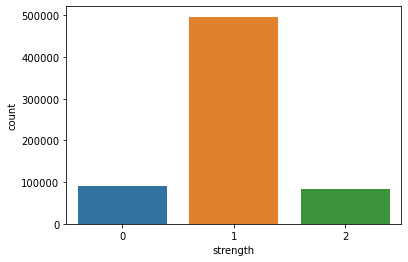

In [13]:
sns.countplot(data=df, x="strength")

In [14]:
df_a=np.array(df)
df_a

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [15]:
def fun1(x):
    x_char=[]
    for i in range(len(x)):
        x_char.append(x[i])
    return x_char    
    

In [16]:
fun1('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

In [17]:
df_a.shape

(669639, 2)

In [18]:
x=df_a[:,0]
y=df_a[:,1]

In [19]:
y=y.astype(int)

In [20]:
x_list=list(map(fun1,x))

In [21]:
x_list[0:5]

[['k', 'z', 'd', 'e', '5', '5', '7', '7'],
 ['k', 'i', 'n', 'o', '3', '4', '3', '4'],
 ['v', 'i', 's', 'i', '7', 'k', '1', 'y', 'r'],
 ['m', 'e', 'g', 'z', 'y', '1', '2', '3'],
 ['l', 'a', 'm', 'b', 'o', 'r', 'g', 'h', 'i', 'n', '1']]

## Use TF-IDF to generate tokens/ using bigrams to start with

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
vectorizer = TfidfVectorizer(analyzer='char',ngram_range=tuple([1,2]))
X = vectorizer.fit_transform(x)
vectorizer.get_feature_names_out()

array(['\x01', '\x01±', '\x02', ..., '›+', '›ð', '™'], dtype=object)

In [24]:
X.shape

(669639, 4162)

## Split data in test and train

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

## Model development :Logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
clf=LogisticRegression(random_state=0,multi_class='multinomial')

In [29]:
clf.fit(X_train,y_train)

C:\Users\syednajme\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=0)

## Predict  and Evaluate

In [30]:
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)


In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [32]:
print('************Train**************')
print(confusion_matrix(y_train,y_pred_train))
print("Accuracy:",accuracy_score(y_train,y_pred_train))
print('************Test**************')
print(confusion_matrix(y_test,y_pred_test))
print("Accuracy:",accuracy_score(y_test,y_pred_test))

************Train**************
[[ 41851  20864      0]
 [  8641 338456    851]
 [   104   5485  52495]]
Accuracy: 0.9233168425611257
************Test**************
[[ 17778   9208      0]
 [  3927 144517    409]
 [    62   2440  22551]]
Accuracy: 0.9201262369830556


In [33]:
from sklearn.metrics import classification_report
print('************Train**************')
print(classification_report(y_train,y_pred_train))
print('************Test**************')
print(classification_report(y_test,y_pred_test))

************Train**************
              precision    recall  f1-score   support

           0       0.83      0.67      0.74     62715
           1       0.93      0.97      0.95    347948
           2       0.98      0.90      0.94     58084

    accuracy                           0.92    468747
   macro avg       0.91      0.85      0.88    468747
weighted avg       0.92      0.92      0.92    468747

************Test**************
              precision    recall  f1-score   support

           0       0.82      0.66      0.73     26986
           1       0.93      0.97      0.95    148853
           2       0.98      0.90      0.94     25053

    accuracy                           0.92    200892
   macro avg       0.91      0.84      0.87    200892
weighted avg       0.92      0.92      0.92    200892



## XGBOOST

In [34]:
import xgboost as xgb

In [35]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
# xgb_model.fit(X, y)
xgb_model.fit(X_train,y_train)



C:\Users\syednajme\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:04:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
y_pred_train=xgb_model.predict(X_train)
y_pred_test=xgb_model.predict(X_test)


In [37]:
print('************Train**************')
print(confusion_matrix(y_train,y_pred_train))
print("Accuracy:",accuracy_score(y_train,y_pred_train))
print('************Test**************')
print(confusion_matrix(y_test,y_pred_test))
print("Accuracy:",accuracy_score(y_test,y_pred_test))

************Train**************
[[ 57577   5138      0]
 [  2041 345272    635]
 [    19   1048  57017]]
Accuracy: 0.9810537454106373
************Test**************
[[ 23914   3072      0]
 [  1170 147079    604]
 [     7    942  24104]]
Accuracy: 0.9711536547000378


In [38]:
from sklearn.metrics import classification_report
print('************Train**************')
print(classification_report(y_train,y_pred_train))
print('************Test**************')
print(classification_report(y_test,y_pred_test))

************Train**************
              precision    recall  f1-score   support

           0       0.97      0.92      0.94     62715
           1       0.98      0.99      0.99    347948
           2       0.99      0.98      0.99     58084

    accuracy                           0.98    468747
   macro avg       0.98      0.96      0.97    468747
weighted avg       0.98      0.98      0.98    468747

************Test**************
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     26986
           1       0.97      0.99      0.98    148853
           2       0.98      0.96      0.97     25053

    accuracy                           0.97    200892
   macro avg       0.97      0.95      0.96    200892
weighted avg       0.97      0.97      0.97    200892



## XGBOOST gives real good results and does not overfits hence parameter tuning is not required

## Predict any new password strength

In [74]:
def chk_st(x):
    
    dt=np.array([x])
    pred=vectorizer.transform(dt)
    return("strength:",clf.predict(pred)[0])
    


In [75]:
chk_st('zxcv')

('strength:', 0)

In [76]:
chk_st('Qasdf@20456')

('strength:', 2)